In [22]:
import pandas as pd
import numpy as np

#Import Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Import Modeling Libraries
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [23]:
dataset = pd.read_csv('diabetes_dataset.csv')

In [24]:
dataset.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,Outcome
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [25]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   Outcome              100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [26]:
dataset.shape

(100000, 9)

In [27]:
print(dataset[dataset.duplicated()].shape)

(3854, 9)


In [28]:
#Removing Duplicates
dataset = dataset.drop_duplicates()

In [29]:
for column in dataset.columns:
    print("{:20} {} unique values".format(column, len(dataset[column].unique())))

gender               3 unique values
age                  102 unique values
hypertension         2 unique values
heart_disease        2 unique values
smoking_history      6 unique values
bmi                  4247 unique values
HbA1c_level          18 unique values
blood_glucose_level  18 unique values
Outcome              2 unique values


In [30]:
print(dataset["gender"].unique())

['Female' 'Male' 'Other']


In [31]:
#Remove 'Other'
dataset = dataset[dataset["gender"] != 'Other']

In [32]:
dataset["smoking_history"].value_counts()

never          34395
No Info        32881
former          9299
current         9197
not current     6359
ever            3997
Name: smoking_history, dtype: int64

In [33]:
dataset["smoking_history"].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [34]:
    smoking = []

    for i in dataset["smoking_history"]:
        if i in ['No Info', 'ever']:
            smoking.append(0)
        elif i == 'never':
            smoking.append(1)
        elif i in ['former', 'not current']:
            smoking.append(2)
        else:
            smoking.append(3)

    dataset["smoking_history"] = smoking

In [35]:
#Encoding gender: female = 0, male = 1
ordinal_encoder = OrdinalEncoder()
dataset["gender"] = ordinal_encoder.fit_transform(dataset[["gender"]])

In [36]:
dataset.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,Outcome
0,0.0,80.0,0,1,1,25.19,6.6,140,0
1,0.0,54.0,0,0,0,27.32,6.6,80,0
2,1.0,28.0,0,0,1,27.32,5.7,158,0
3,0.0,36.0,0,0,3,23.45,5.0,155,0
4,1.0,76.0,1,1,3,20.14,4.8,155,0


In [37]:
dataset.describe()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,Outcome
count,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000
mean,0.415769,41.796617,0.077615,0.040810,0.970602,27.321450,5.532633,138.218001,0.088237
std,0.492857,22.463329,0.267567,0.197851,0.963517,6.767811,1.073225,40.911190,0.283640
min,0.000000,0.080000,0.000000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,0.000000,24.000000,0.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,0.000000,43.000000,0.000000,0.000000,1.000000,27.320000,5.800000,140.000000,0.000000
75%,1.000000,59.000000,0.000000,0.000000,2.000000,29.860000,6.200000,159.000000,0.000000
max,1.000000,80.000000,1.000000,1.000000,3.000000,95.690000,9.000000,300.000000,1.000000


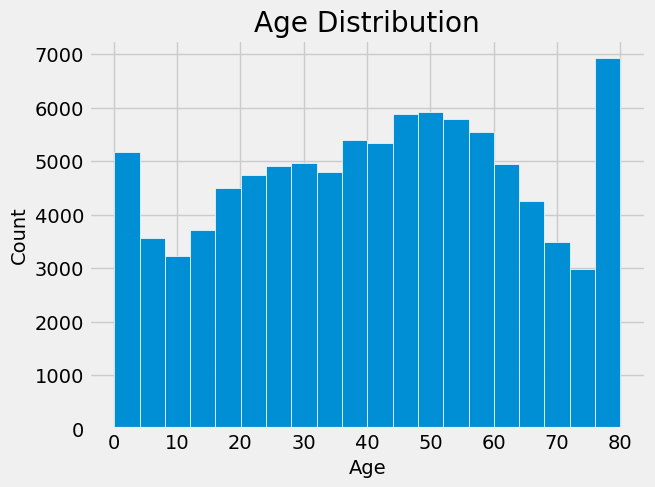

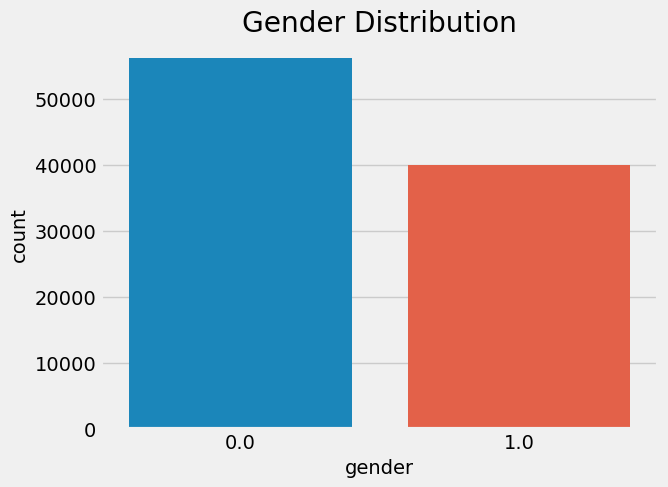

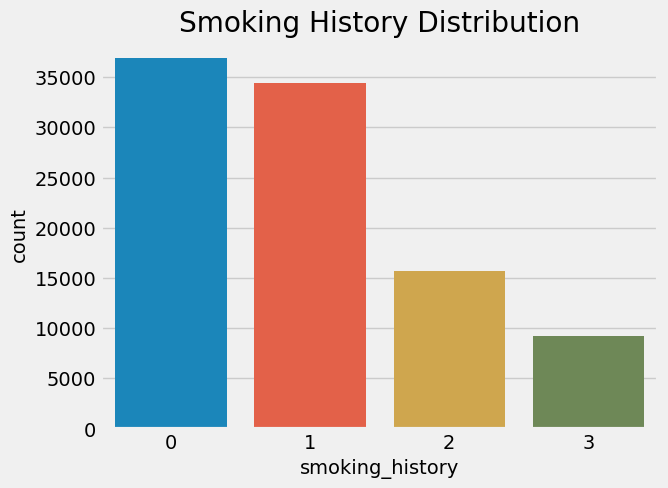

In [38]:
plt.style.use('fivethirtyeight')
plt.hist(dataset['age'], bins=20, ec = 'white')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

sns.countplot(x = 'gender', data = dataset)
plt.title('Gender Distribution')
plt.show()

sns.countplot(x ='smoking_history', data = dataset)
plt.title('Smoking History Distribution')
plt.show()


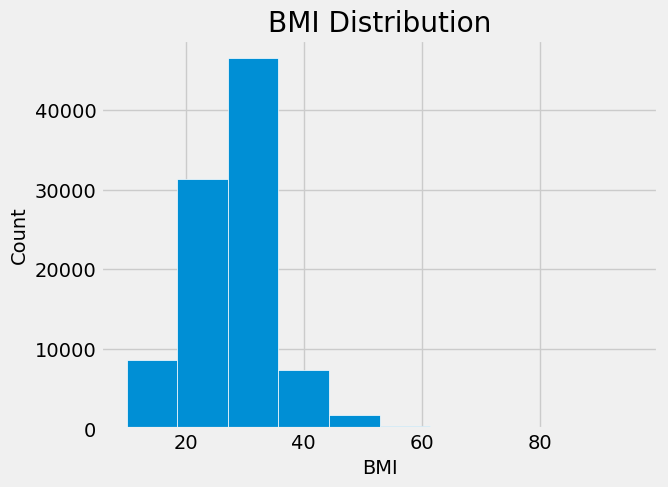

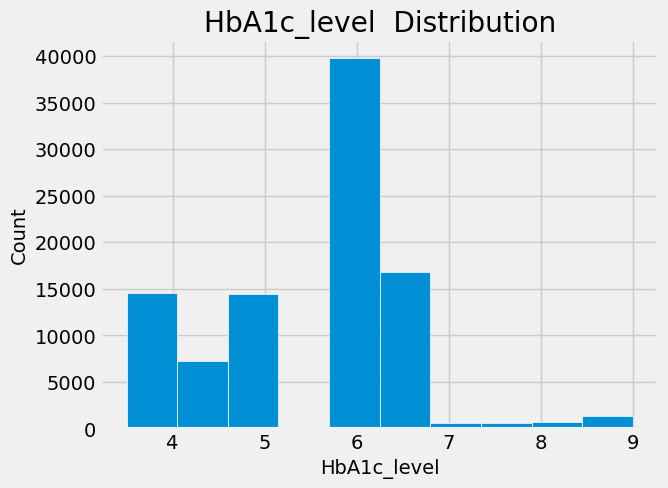

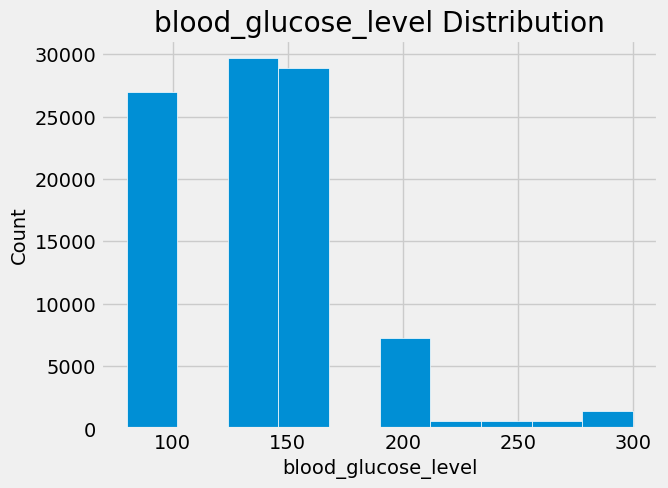

In [39]:
plt.hist(dataset['bmi'], bins=10, edgecolor = 'white')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

plt.hist(dataset['HbA1c_level'], bins=10, edgecolor = 'white')
plt.title('HbA1c_level  Distribution')
plt.xlabel('HbA1c_level')
plt.ylabel('Count')
plt.show()

plt.hist(dataset['blood_glucose_level'], bins=10, edgecolor = 'white')
plt.title('blood_glucose_level Distribution')
plt.xlabel('blood_glucose_level')
plt.ylabel('Count')
plt.show()

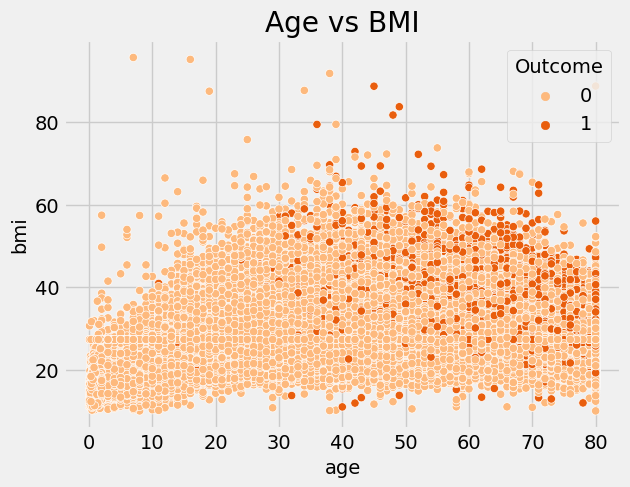

In [40]:
sns.scatterplot(x ='age', y ='bmi', hue ='Outcome', data= dataset, palette = 'Oranges')
plt.title('Age vs BMI')
plt.show()

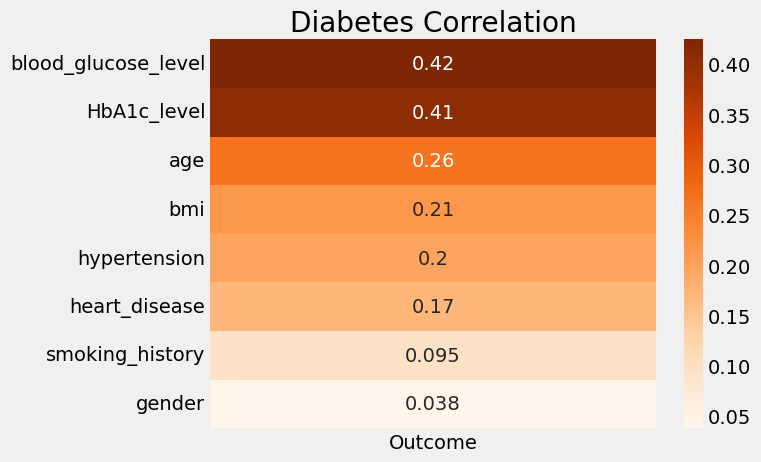

In [41]:
#Features with high correlation to diabetes in descending order
correlation = dataset.corr()
target_correlation = correlation['Outcome'].drop('Outcome').sort_values(ascending = False)
sns.heatmap(target_correlation.to_frame(), cmap="Oranges", annot=True)
plt.title('Diabetes Correlation')
plt.show()

In [42]:
#Creates the training and test set on an 80-20 split

X = dataset.drop(["Outcome"], axis = 1).values
y = dataset["Outcome"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [43]:
#Standardize the features under the same scale and range

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [44]:
#Random forest classifier
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(random_state=42)

# Fit the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy_rf = rf_classifier.score(X_test, y_test)
print("Random Forest Accuracy:", accuracy_rf)

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9669718090086341

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     17525
           1       0.94      0.67      0.78      1701

    accuracy                           0.97     19226
   macro avg       0.96      0.83      0.88     19226
weighted avg       0.97      0.97      0.96     19226



In [45]:
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression(random_state=42)

# Fit the model on the training data
logreg_model.fit(X_train, y_train)

# Predict on the test data
y_pred_logreg = logreg_model.predict(X_test)

# Calculate accuracy
accuracy_logreg = logreg_model.score(X_test, y_test)
print("Logistic Regression Accuracy:", accuracy_logreg)

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_logreg))


Logistic Regression Accuracy: 0.9570893581608239

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     17525
           1       0.86      0.62      0.72      1701

    accuracy                           0.96     19226
   macro avg       0.91      0.80      0.85     19226
weighted avg       0.95      0.96      0.95     19226



In [46]:
#SUPPORT VECTOR MACHINE
from sklearn.svm import SVC

svm_classifier = SVC(random_state=42)

# Fit the model on the training data
svm_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred_svm = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy_svm = svm_classifier.score(X_test, y_test)
print("SVM Accuracy:", accuracy_svm)

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.960054093415167

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17525
           1       0.97      0.56      0.71      1701

    accuracy                           0.96     19226
   macro avg       0.97      0.78      0.85     19226
weighted avg       0.96      0.96      0.96     19226



In [47]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()

# Fit the model on the training data
nb_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred_nb = nb_classifier.predict(X_test)

# Calculate accuracy
accuracy_nb = nb_classifier.score(X_test, y_test)
print("Naive Bayes Accuracy:", accuracy_nb)

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.8989389368563404

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94     17525
           1       0.45      0.64      0.53      1701

    accuracy                           0.90     19226
   macro avg       0.71      0.78      0.74     19226
weighted avg       0.92      0.90      0.91     19226



In [48]:
from sklearn.neighbors import KNeighborsClassifier

# Create an instance of the KNN model with k=5 (you can choose a different value for k)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Fit the model on the training data
knn_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred_knn = knn_classifier.predict(X_test)

# Calculate accuracy
accuracy_knn = knn_classifier.score(X_test, y_test)
print("KNN Accuracy:", accuracy_knn)

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.9583376677415999

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     17525
           1       0.87      0.62      0.72      1701

    accuracy                           0.96     19226
   macro avg       0.92      0.81      0.85     19226
weighted avg       0.96      0.96      0.96     19226



In [ ]:
#USING RANDOM FOREST MODEL TO PREDICT

import numpy as np

# Function to preprocess the user input
def preprocess_input(input_data):
    # Standardize the input data using the previously used StandardScaler
    input_data = sc.transform(input_data.reshape(1, -1))
    return input_data

# Function to validate the user input for gender
def get_valid_gender():
    while True:
        try:
            gender = int(input("Enter gender (Female=0, Male=1): "))
            if gender in [0, 1]:
                return gender
            else:
                print("Invalid input! Please enter 0 for Female or 1 for Male.")
        except ValueError:
            print("Invalid input! Please enter a valid integer.")

# Function to validate the user input for hypertension and heart disease
def get_valid_binary_input(attribute_name):
    while True:
        try:
            value = int(input(f"{attribute_name} (0 for No, 1 for Yes): "))
            if value in [0, 1]:
                return value
            else:
                print(f"Invalid input! Please enter 0 for No or 1 for Yes.")
        except ValueError:
            print("Invalid input! Please enter a valid integer.")

# Function to validate the user input for smoking history
def get_valid_smoking_history():
    while True:
        try:
            smoking_history = int(input("Smoking History (0 for 'No Info', 1 for 'never', 2 for 'former/not current', 3 for 'current'): "))
            if smoking_history in [0, 1, 2, 3]:
                return smoking_history
            else:
                print("Invalid input! Please enter a valid option.")
        except ValueError:
            print("Invalid input! Please enter a valid integer.")

# Function to validate the user input for age within the specified range
def get_valid_age():
    while True:
        try:
            age = float(input("Enter age: "))
            if 5 <= age <= 100:
                return age
            else:
                print("Invalid input! Please enter an age between 5 and 122.")
        except ValueError:
            print("Invalid input! Please enter a valid numeric value.")

# Function to take user inputs and predict diabetes using the Random Forest model
def predict_diabetes():
    # Take user inputs with validation
    gender = get_valid_gender()
    age = get_valid_age()
    hypertension = get_valid_binary_input("Hypertension")
    heart_disease = get_valid_binary_input("Heart Disease")
    smoking_history = get_valid_smoking_history()
    bmi = float(input("Enter BMI: "))
    HbA1c_level = float(input("Enter HbA1c Level (1-10): "))
    blood_glucose_level = int(input("Enter Blood Glucose Level: "))

    # Create a numpy array from the user inputs
    user_input = np.array([gender, age, hypertension, heart_disease, smoking_history, bmi, HbA1c_level, blood_glucose_level])

    # Preprocess the user input
    preprocessed_input = preprocess_input(user_input)

    # Predict using the Random Forest model
    prediction = rf_classifier.predict(preprocessed_input)

    if prediction[0] == 0:
        print("\n\nThe person does not have diabetes.")
    else:
        print("\n\nThe person has diabetes.")

# Call the predict_diabetes function
predict_diabetes()
